In [1]:
from google.colab import drive
import os
import pandas as pd
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/ML Project'

/content/drive/MyDrive/ML Project


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
ds = pd.read_csv('whole_dataset_dont_touch.csv')

In [5]:
def calculate_percentage_of_value_for_columns(df, value):
    '''For a dataframe calculates the percentage of zeros in each column'''
    percent_zero = (df == value).sum() * 100 / len(df)
    zero_value_df = pd.DataFrame({'percent_zero': percent_zero})
    output_series = zero_value_df.sort_values('percent_zero')
    return output_series

In [6]:
X = ds.drop(columns=['death'])
y = ds[['patient_number', 'death']]

In [7]:
X_train = X_train.astype({'patient_number':'int'})
X_test = X_test.astype({'patient_number':'int'})
y_train = y_train.astype({'patient_number':'int'})
y_test = y_test.astype({'patient_number':'int'})
X = X.astype({'patient_number':'int'})
y = y.astype({'patient_number':'int'})

In [8]:
X_train = X_train.set_index('patient_number')
X_test = X_test.set_index('patient_number')
y_train = y_train.set_index('patient_number')
y_test = y_test.set_index('patient_number')
X = X.set_index('patient_number')
y = y.set_index('patient_number')

In [9]:
X

,age,gender,history_of_ihd,history_of_diabetes,area_of_stroke,arterial_hypertension,risk==4,glascow_coma_score,average_blood_pressure,glucocorticosteroids,...,dyscirculatory_encephalopathy,angina,chd,infarction_myocardial,mitral_defect,degenerative_calcification,aortic_defect,ischemic_stroke,thromboembolism,rheumatic_heart_disease
patient_number,,,,,,,,,,,,,,,,,,,,,
1,87.0,0,1,0.0,1,1.0,1.0,11.500000,180.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72.0,0,0,1.0,2,1.0,1.0,15.000000,190.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55.0,1,0,0.0,1,1.0,1.0,9.500000,168.437500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76.0,0,1,1.0,2,1.0,1.0,12.714286,162.500000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,72.0,0,0,0.0,2,1.0,1.0,14.900000,155.555556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,79.0,1,0,1.0,0,1.0,1.0,6.617647,165.227273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,64.0,1,0,0.0,2,1.0,1.0,8.703704,148.684211,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,51.0,0,0,0.0,0,1.0,1.0,13.450000,166.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = pd.concat([X_train, X_test], axis=1)
y = pd.concat([y_train, y_test], axis=1)

In [11]:
y_pred = np.zeros(120)
accuracy_score(y_pred, y_train)

0.6333333333333333

# Logistic Regression

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
[0.63, 0.57, 0.7, 0.73, 0.77, 0.77, 0.77, 0.77]
[0.63, 0.7, 0.79, 0.78, 0.78, 0.75, 0.73, 0.74]


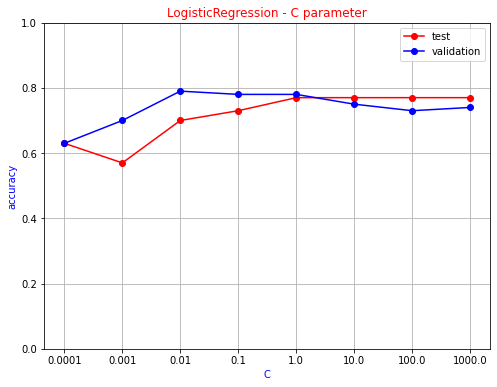

In [12]:
import matplotlib.pyplot as plt
C = []
z = 1e-4
for i in range(8):
	C.append(z)
	z = z * 10
print(C)
test = []
validation = []


for i in range(len(C)):
  clf = LogisticRegression(C=C[i], max_iter=10000)
  LOG=clf.fit(X_train,y_train.values.ravel())
  test.append(round(LOG.score(X_test, y_test.values.ravel()),2))

  Accuracy_Values=cross_val_score(LOG, X_train , y_train.values.ravel(), cv=10)
  validation.append(round(Accuracy_Values.mean(),2))

print(test) 
print(validation)
alpha_tick = list(range(len(C)))
plt.rcParams["figure.figsize"] = (8,6)

plt . ylim (0, 1)
plt . plot (alpha_tick , test , marker ='o', color = 'red', label = 'test' )
plt . plot (alpha_tick , validation , marker ='o', color = 'blue', label = 'validation' )

plt . xlabel ( 'C', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . xticks (alpha_tick, C)
plt . title ( 'LogisticRegression - C parameter', color = "red")
plt . legend()
plt . grid ()
plt . show ()



[0.77, 0.77, 0.77, 0.7, 0.7]
[0.78, 0.78, 0.77, 0.78, 0.77]


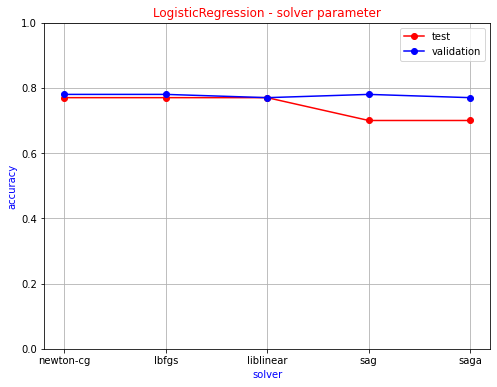

In [13]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
test = []
validation = []


for i in range(len(solver)):
  clf = LogisticRegression(C=1, solver = solver[i], max_iter=10000)
  LOG=clf.fit(X_train,y_train.values.ravel())
  test.append(round(LOG.score(X_test, y_test),2))
  
  Accuracy_Values=cross_val_score(LOG, X_train , y_train.values.ravel(), cv=10)
  validation.append(round(Accuracy_Values.mean(),2))

print(test) 
print(validation)
alpha_tick = list(range(len(solver)))
plt.rcParams["figure.figsize"] = (8,6)

plt . ylim (0, 1)
plt . plot (alpha_tick , test , marker ='o', color = 'red', label = 'test' )
plt . plot (alpha_tick , validation , marker ='o', color = 'blue', label = 'validation' )

plt . xlabel ( 'solver', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . xticks (alpha_tick, solver)
plt . title ( 'LogisticRegression - solver parameter', color = "red")
plt . legend()
plt . grid ()
plt . show ()

[0.77, 0.77]
[0.78, 0.74]


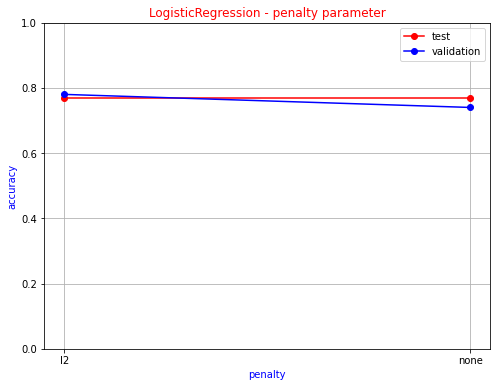

In [14]:
solver = [ 'l2','none']
test = []
validation = []
for i in range(len(solver)):
  clf = LogisticRegression(C=1, solver = 'lbfgs', max_iter=10000, penalty=solver[i])
  LOG=clf.fit(X_train,y_train.values.ravel())
  test.append(round(LOG.score(X_test, y_test),2))
  
  Accuracy_Values=cross_val_score(LOG, X_train , y_train.values.ravel(), cv=10)
  validation.append(round(Accuracy_Values.mean(),2))

print(test) 
print(validation)
alpha_tick = list(range(len(solver)))
plt.rcParams["figure.figsize"] = (8,6)

plt . ylim (0, 1)
plt . plot (alpha_tick , test , marker ='o', color = 'red', label = 'test' )
plt . plot (alpha_tick , validation , marker ='o', color = 'blue', label = 'validation' )

plt . xlabel ( 'penalty', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . xticks (alpha_tick, solver)
plt . title ( 'LogisticRegression - penalty parameter', color = "red")
plt . legend()
plt . grid ()
plt . show ()

In [15]:
Features = []
for col in X_train.columns:
    Features.append(col)
Features

['glascow_coma_score',
 'average_blood_pressure',
 'age',
 'arterial_hypertension',
 'risk==4',
 'area_of_stroke',
 'gender',
 'chf',
 'stroke_type',
 'history_of_ihd',
 'cardiac_dysrhythmia',
 'glucocorticosteroids',
 'cardiosclerosis',
 'history_of_a-fibrillation',
 'history_of_a-fibrillation_(yes/no)',
 'history_of_diabetes',
 'history_of_chronic_renal_failure_(yes/no)',
 'history_of_chronic_renal_failure',
 'chd',
 'history_of_metabolic_syndrome_(yes/no)',
 'history_of_metabolic_syndrome',
 'rheumatic_heart_disease',
 'atherosclerosis',
 'circulatory_failure',
 'dias_bp_on_admission_to_hospital',
 'heart_rate_on_admission_to_hospital',
 'hemiparesis_on_admission_to_hospital_(yes/no/unconscious)',
 'cerebral_edema_on_admission']

In [16]:
clf = LogisticRegression(C=1, penalty='l2',solver = 'lbfgs', max_iter=10000)

LOG=clf.fit(X_train,y_train.values.ravel())
prediction=LOG.predict(X_test)


print(metrics.classification_report(y_test.values.ravel(), prediction))
print('Accuracy of the model on Testing Sample Data:', round(LOG.score(X_test, y_test.values.ravel()),2))


Accuracy_Values=cross_val_score(LOG, X_train , y_train.values.ravel(), cv=10)
print('\nAverage Accuracy of the Validation model:', round(Accuracy_Values.mean(),2))



              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.73      0.67      0.70        12

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30

Accuracy of the model on Testing Sample Data: 0.77

Average Accuracy of the Validation model: 0.78


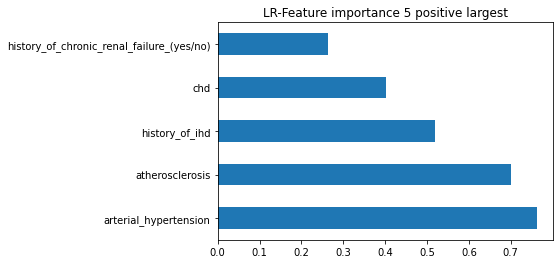

In [17]:
%matplotlib inline
feature_importances = pd.Series(LOG.coef_[0], index=Features)
feature_importances.nlargest(5).plot(kind='barh', title = "LR-Feature importance 5 positive largest")

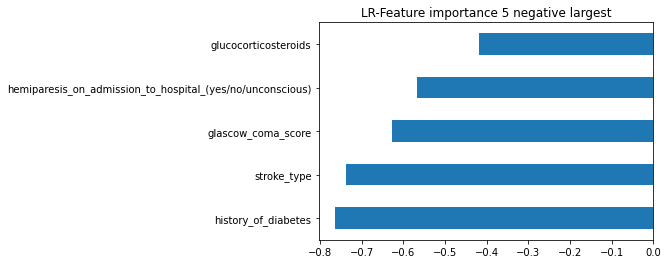

In [18]:
%matplotlib inline
feature_importances = pd.Series(LOG.coef_[0], index=Features)
feature_importances.nsmallest(5).plot(kind='barh', title = "LR-Feature importance 5 negative largest")

# Naive Bayes

[1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]
[0.6, 0.6, 0.6, 0.57, 0.53, 0.57, 0.57, 0.63, 0.67, 0.67, 0.5, 0.63]
[0.53, 0.56, 0.57, 0.61, 0.68, 0.72, 0.73, 0.72, 0.8, 0.77, 0.62, 0.62]


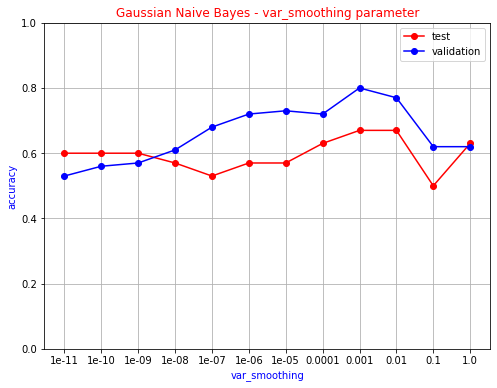

In [19]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


C = []
z = 1e-11
for i in range(12):
	C.append(round(z,11))
	z = z * 10
print(C)
test = []
validation = []


for i in range(len(C)):
  gnb = GaussianNB(var_smoothing = C[i])
  gnb.fit(X_train,y_train.values.ravel())
  test.append(round(gnb.score(X_test, y_test.values.ravel()),2))

  Accuracy_Values=cross_val_score(gnb, X_train , y_train.values.ravel(), cv=10)
  validation.append(round(Accuracy_Values.mean(),2))

print(test) 
print(validation)
alpha_tick = list(range(len(C)))
plt.rcParams["figure.figsize"] = (8,6)

plt . ylim (0, 1)
plt . plot (alpha_tick , test , marker ='o', color = 'red', label = 'test' )
plt . plot (alpha_tick , validation , marker ='o', color = 'blue', label = 'validation' )

plt . xlabel ( 'var_smoothing', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . xticks (alpha_tick, C)
plt . title ( 'Gaussian Naive Bayes - var_smoothing parameter', color = "red")
plt . legend()
plt . grid ()
plt . show ()

In [20]:
from sklearn.inspection import permutation_importance
clf = GaussianNB(var_smoothing = 0.001)

LOG=clf.fit(X_train,y_train.values.ravel())
prediction=LOG.predict(X_test)


print(metrics.classification_report(y_test.values.ravel(), prediction))
print('Accuracy of the model on Testing Sample Data:', round(LOG.score(X_test, y_test.values.ravel()),2))


Accuracy_Values=cross_val_score(LOG, X_train , y_train.values.ravel(), cv=10)
print('\nAverage Accuracy of the Validation model:', round(Accuracy_Values.mean(),2))


              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.57      0.67      0.62        12

    accuracy                           0.67        30
   macro avg       0.66      0.67      0.66        30
weighted avg       0.68      0.67      0.67        30

Accuracy of the model on Testing Sample Data: 0.67

Average Accuracy of the Validation model: 0.8


In [21]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(LOG, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, Features[indices[f]], importances[indices[f]]))

Feature ranking:
1. glascow_coma_score (0.073333)
2. glucocorticosteroids (0.020000)
3. history_of_chronic_renal_failure (0.020000)
4. history_of_chronic_renal_failure_(yes/no) (0.020000)
5. history_of_ihd (0.013333)
6. heart_rate_on_admission_to_hospital (0.006667)
7. atherosclerosis (0.006667)
8. average_blood_pressure (0.000000)
9. gender (0.000000)
10. age (0.000000)
11. stroke_type (0.000000)
12. cardiosclerosis (0.000000)
13. hemiparesis_on_admission_to_hospital_(yes/no/unconscious) (0.000000)
14. history_of_diabetes (0.000000)
15. chd (0.000000)
16. history_of_metabolic_syndrome_(yes/no) (0.000000)
17. history_of_metabolic_syndrome (0.000000)
18. rheumatic_heart_disease (0.000000)
19. circulatory_failure (0.000000)
20. risk==4 (0.000000)
21. dias_bp_on_admission_to_hospital (-0.013333)
22. arterial_hypertension (-0.020000)
23. cardiac_dysrhythmia (-0.020000)
24. area_of_stroke (-0.020000)
25. history_of_a-fibrillation (-0.026667)
26. chf (-0.026667)
27. history_of_a-fibrillation

# Final Results

In [26]:
#accur_val = [0.78, 0.8 ,0.74 ,0.74 ,0.75 ,0.75] #define accuracy values
#model_selected = ['LR','GNB','DT','RFC','SVM','MLP'] #define models
#accur_test = [0.77, 0.67, 0.7, 0.7, 0.7, 0.7]  #sorting
accur_val = [0.8, 0.66, 0.78, 0.78, 0.76, ] #define accuracy values
model_selected = ['GNB','P', 'SVM','LR', 'DT', 'RFC', 'RFC_ROC'] #define models
accur_test = [ 0.67, 0.67, 0.73,0.77, 0.77, 0.8, 0.87 ]  #sorting

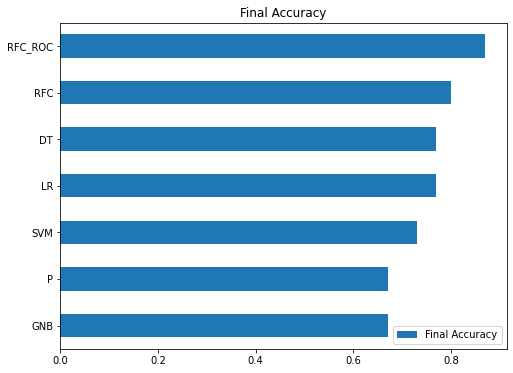

In [37]:
df = pd.DataFrame({'Final Accuracy': accur_test}, index=model_selected)
ax = df.plot.barh(rot=0, subplots=True)


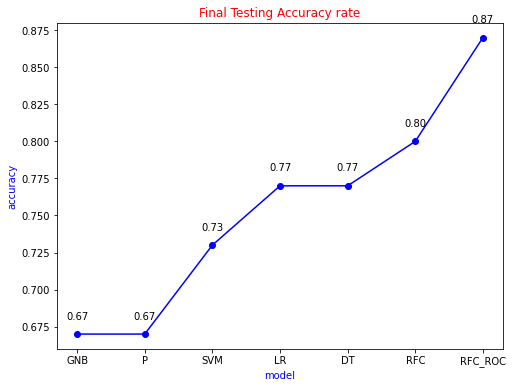

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()


plt.plot(model_selected,accur_test,'bo-')
plt.rcParams["figure.figsize"] = (8,6)

for x,y in zip(model_selected,accur_test):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,15), 
                 ha='center')
plt . xlabel ( 'model', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . title ( 'Final Testing Accuracy rate', color = "red")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()


plt.plot(model_selected,accur_test,'bo-')
plt.rcParams["figure.figsize"] = (8,6)

for x,y in zip(model_selected,accur_test):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,15), 
                 ha='center')
plt . xlabel ( 'model', color = "blue" )
plt . ylabel ( 'accuracy', color = "blue" )
plt . title ( 'Final Testing Accuracy rate', color = "red")
plt.show()